### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

<div dir="rtl">
     کتابخانه‌های مورد نیاز برای پردازش تصاویر و انجام محاسبات وارد می‌شوند. کتابخانه‌های مورد استفاده شامل os برای کار با سیستم فایل، numpy برای عملیات عددی، matplotlib.pyplot برای نمایش تصاویر، cv2 از کتابخانه OpenCV برای خواندن تصاویر، skimage.transform برای تغییر اندازه تصاویر، و sklearn.metrics برای محاسبه دقت مدل می‌باشد.
</div>


### Load and Preprocess Images from a Folder

In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder, filename),cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = img.flatten()
                images.append(img)
                label = int(filename.split('_')[0])  
                labels.append(label)
    return np.array(images), np.array(labels)

<div dir="rtl">
تابعی برای بارگذاری تصاویر از یک فایل تعریف می‌شود. این تابع، فایل‌های PNG موجود در فایل مشخص شده را خوانده و به صورت تصاویر خاکستری ذخیره می‌کند. همچنین، برچسب‌های مربوط به هر تصویر از نام فایل استخراج می‌شود. برای این کار، فرض می‌شود که نام فایل‌ها شامل شماره کلاس در ابتدای نام است (به عنوان مثال: '0_img1.png').
تابعی برای پیش‌پردازش تصاویر تعریف می‌شود. این تابع تصاویر را به ابعاد مشخص تغییر اندازه داده و به صورت یک بردار تخت تبدیل می‌کند. این کار به منظور استانداردسازی ابعاد تصاویر و آماده‌سازی آن‌ها برای مراحل بعدی پردازش انجام می‌شود.
    
</div>


### Load Dataset

In [3]:
def load_dataset(group):
    train_images, train_labels = load_images_from_folder(f'dataset/{group}/train')
    test_images, test_labels = load_images_from_folder(f'dataset/{group}/test')
    return train_images, train_labels, test_images, test_labels

<div dir="rtl">
    تابعی برای بارگذاری مجموعه داده تعریف شده که تصاویر و برچسب‌های آموزشی و تست را از فایل‌ها بارگذاری و پیش‌پردازش می‌کند. داده‌های train و تست برای هر گروه به صورت جداگانه بارگذاری شده و آماده استفاده در مدل می‌شود.
    </div>


### Prototypes for Each Class

In [4]:
def compute_prototypes(train_images, train_labels):
    classes = np.unique(train_labels)
    prototypes = {}
    for cls in classes:
        class_images = train_images[train_labels == cls]
        prototypes[cls] = np.mean(class_images, axis=0)
    return prototypes

def display_prototypes(prototypes):
    for cls, proto in prototypes.items():
        plt.imshow(proto.reshape(60, 60), cmap='gray')
        plt.title(f'Prototype for class {cls}')
        plt.show()

<div dir="rtl">
    تابعی برای محاسبه نمونه‌های اولیه هر کلاس تعریف شده است که میانگین تصاویر هر کلاس را محاسبه کرده و نمونه اولیه را نمایش می‌دهد. این نمونه‌ها نمایانگر ویژگی‌های کلی هر کلاس هستند و به عنوان نماینده‌ای از هر کلاس در فضای ویژگی‌ها استفاده می‌شوند. همچنین، تابعی برای نمایش نمونه‌های اولیه محاسبه شده نوشته می‌شود.
</div>


### Minimum Distance Classifier (MDC)

In [5]:
def minimum_distance_classifier(test_images, prototypes):
    predictions = []
    for img in test_images:
        distances = {cls: np.linalg.norm(img - proto) for cls, proto in prototypes.items()}
        predicted_class = min(distances, key=distances.get)
        predictions.append(predicted_class)
    return np.array(predictions)

<div dir="rtl">
    تابعی برای پیاده‌سازی طبقه‌بند حداقل فاصله تعریف میگردد که تصاویر تست را بر اساس فاصله آن‌ها از نمونه‌های اولیه دسته‌بندی می‌کند. برای هر تصویر تست، فاصله آن با تمامی نمونه‌های اولیه محاسبه شده و کلاسی که کمترین فاصله را دارد به عنوان پیش‌بینی انتخاب می‌شود.
</div>


### MDC for a Specific Group

In [6]:
def evaluate_mdc(group):
    train_images, train_labels, test_images, test_labels = load_dataset(group)
    print(train_images.shape)
    prototypes = compute_prototypes(train_images, train_labels)
    display_prototypes(prototypes)
    predictions = minimum_distance_classifier(test_images, prototypes)
    error_rate = 1 - accuracy_score(test_labels, predictions)
    print(f'Error rate group {group}: {error_rate * 100:.2f}%')

<div dir="rtl">
   تابعی برای ارزیابی طبقه‌بند حداقل فاصله برای یک گروه خاص تعریف شده که داده‌های آموزشی و تست را بارگذاری کرده، نمونه‌های اولیه را محاسبه و نمایش داده و دقت مدل را گزارش می‌کند. خطا به صورت نرخ خطا محاسبه می‌شود که معادل یک منهای دقت است. این ارزیابی برای هر یک از گروه‌های مختلف (a، b، c) انجام می‌شود. 
</div>


### Classifier for Groups (a), (b), and (c)

(40, 3600)


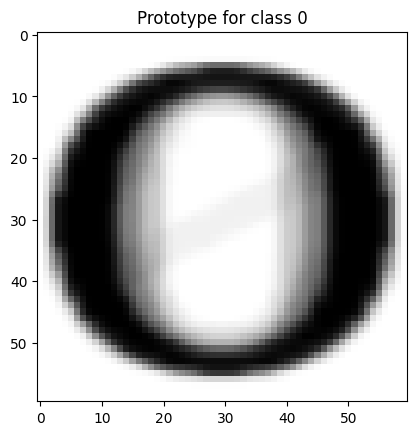

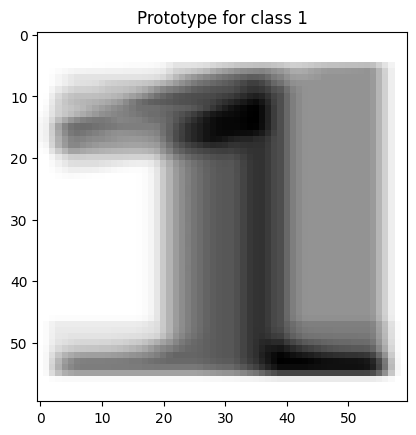

Error rate group a: 0.00%
(80, 3600)


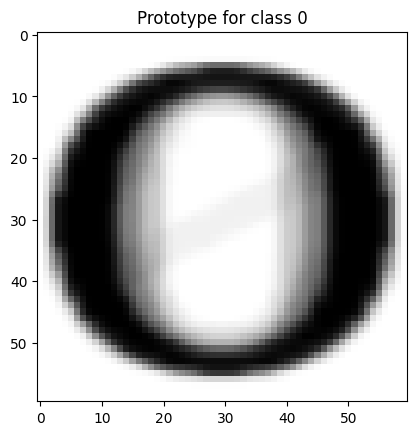

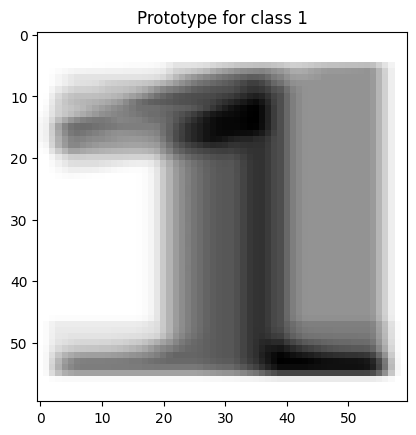

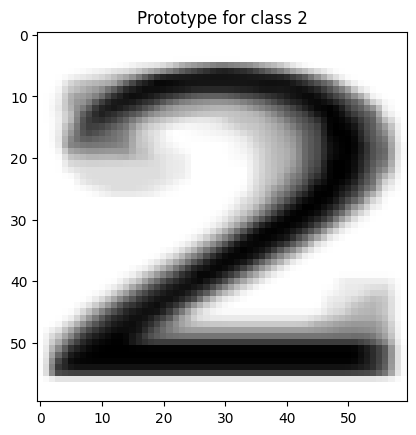

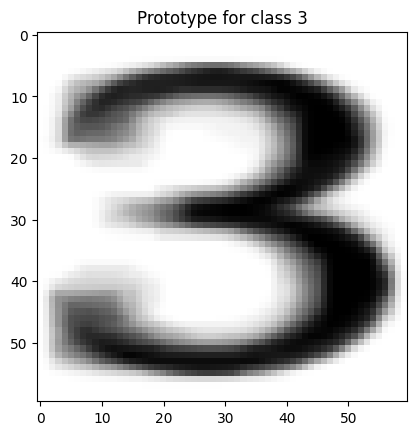

Error rate group b: 0.00%
(200, 3600)


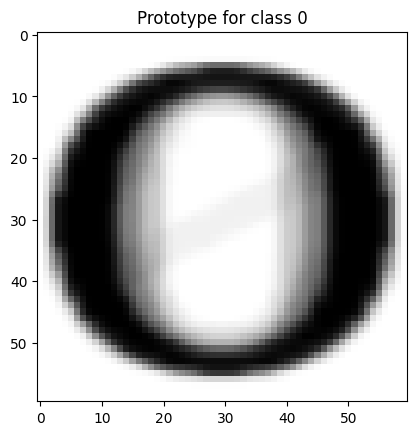

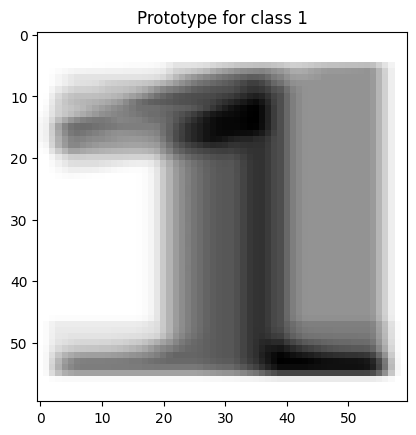

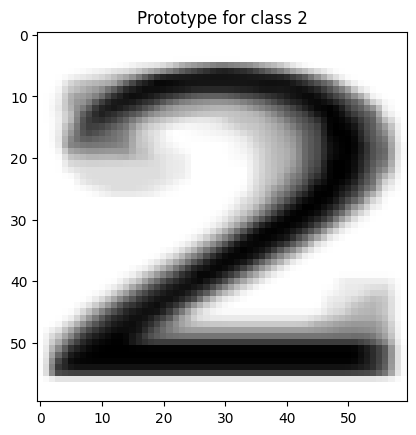

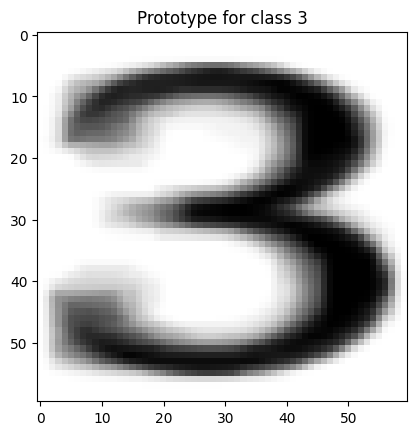

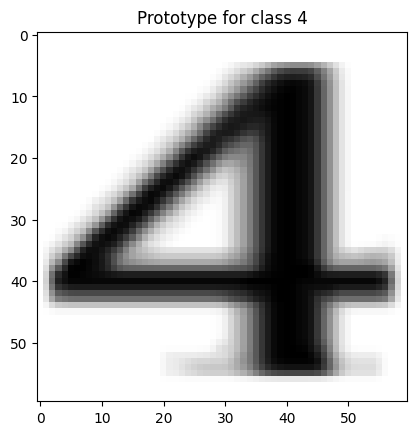

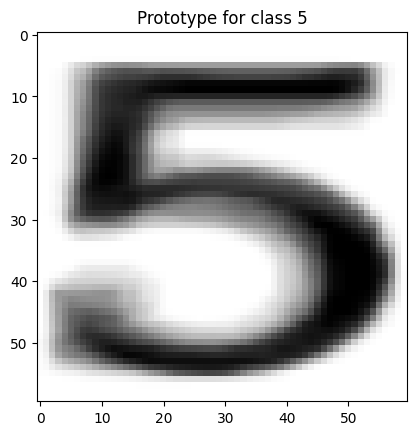

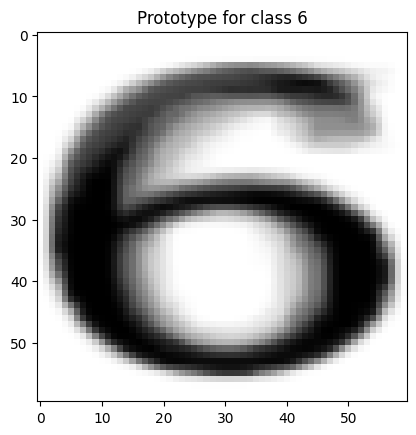

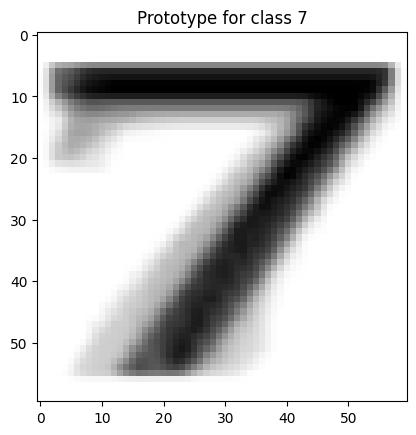

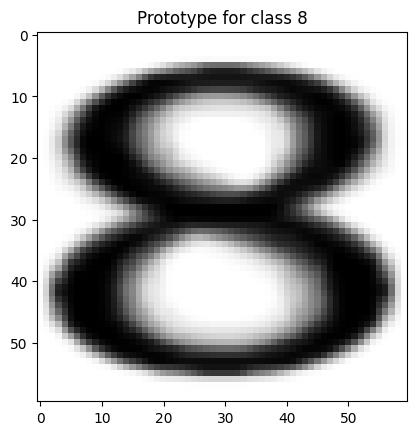

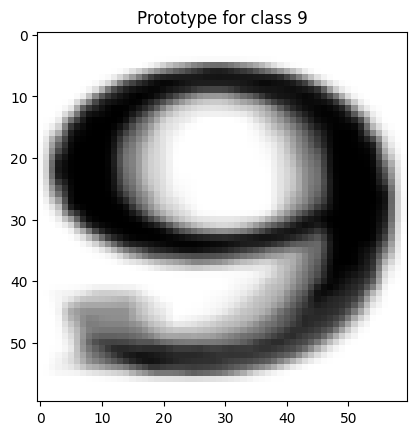

Error rate group c: 1.00%


In [7]:
for group in ['a', 'b', 'c']:
    evaluate_mdc(group)

<div dir="rtl">
    طبقه‌بند حداقل فاصله برای گروه‌های مختلف اجرا می‌شود. نتایج هر گروه ارزیابی و گزارش می‌شود. این بخش به صورت یک حلقه تکراری طراحی شده است که برای هر گروه داده‌های مربوطه را بارگذاری کرده، نمونه‌های اولیه را محاسبه و مدل را ارزیابی می‌کند. در نهایت، نرخ خطای مدل برای هر گروه محاسبه و پرینت می‌شود.
    </div>


<div dir="rtl">
    مشاهدات نشان می‌دهند که علی‌رغم سادگی، MDC عملکرد مناسبی در دسته‌بندی حروف نوشته شده یا چاپ شده دارد. اما، عملکرد آن ممکن است بسته به پیچیدگی و ویژگی‌های مجموعه داده متفاوت باشد. آزمایشات بیشتر با الگوریتم‌ها و تکنیک‌های مختلف می‌تواند به دست آوردن دقت دسته‌بندی بهتر کمک کند.
    </div>

